In [ ]:
from simulator.GRN_synthetic import run_grn_synthetic_experiment

exp_cfg = "configs/grn_experiment.yaml"
exp_result = run_grn_synthetic_experiment(exp_cfg)

print("观测到的基因个数:", len(exp_result.observed_genes))
print("可用条件 (t_mode, perturb_mode, noise_mode):")
for key in exp_result.results.keys():
    print("  ", key)

观测到的基因个数: 15
可用条件 (t_mode, perturb_mode, noise_mode):
   ('dense', 'baseline', 'low')
   ('dense', 'baseline', 'medium')
   ('dense', 'baseline', 'high')
   ('dense', 'baseline', 'abs_baseline')
   ('dense', 'oe', 'low')
   ('dense', 'oe', 'medium')
   ('dense', 'oe', 'high')
   ('dense', 'oe', 'abs_baseline')
   ('dense', 'kd', 'low')
   ('dense', 'kd', 'medium')
   ('dense', 'kd', 'high')
   ('dense', 'kd', 'abs_baseline')
   ('dense', 'kd_full', 'low')
   ('dense', 'kd_full', 'medium')
   ('dense', 'kd_full', 'high')
   ('dense', 'kd_full', 'abs_baseline')
   ('medium', 'baseline', 'low')
   ('medium', 'baseline', 'medium')
   ('medium', 'baseline', 'high')
   ('medium', 'baseline', 'abs_baseline')
   ('medium', 'oe', 'low')
   ('medium', 'oe', 'medium')
   ('medium', 'oe', 'high')
   ('medium', 'oe', 'abs_baseline')
   ('medium', 'kd', 'low')
   ('medium', 'kd', 'medium')
   ('medium', 'kd', 'high')
   ('medium', 'kd', 'abs_baseline')
   ('medium', 'kd_full', 'low')
   ('medium', '

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def plot_condition_timecourses(
    exp_result,
    time_mode: str = "dense",
    perturb_mode: str = "baseline",
    noise_mode: str = "medium",
    n_genes_to_show: int = 5,
):
    """
    画某一个 (time_mode, perturb_mode, noise_mode) 下的
    clean_obs vs noisy_obs time series。

    - 每个子图 = 一个观测到的基因
    - 实线：clean
    - 淡色细线：不同 replicate 的 noisy
    """
    key = (time_mode, perturb_mode, noise_mode)
    if key not in exp_result.results:
        raise KeyError(f"Condition {key} not in exp_result.results")

    cond = exp_result.results[key]
    t = cond.t                      # (T,)
    clean = cond.clean_obs          # (n_obs, T)
    noisy = cond.noisy_obs          # (n_reps, n_obs, T)
    observed_genes = exp_result.observed_genes  # (n_obs,)

    n_obs, T = clean.shape
    n_reps = noisy.shape[0]

    # 随机选几个基因画（不超过 n_obs）
    n_show = min(n_genes_to_show, n_obs)
    idxs = np.linspace(0, n_obs - 1, n_show, dtype=int)

    fig, axes = plt.subplots(n_show, 1, figsize=(8, 2.5 * n_show), sharex=True)

    if n_show == 1:
        axes = [axes]

    for ax, obs_idx in zip(axes, idxs):
        gene_idx = observed_genes[obs_idx]  # 0-based gene index
        gene_label = f"G{gene_idx + 1}"

        # 画干净轨迹
        ax.plot(t, clean[obs_idx, :], linewidth=2, label="clean")

        # 画 noisy 轨迹（每个 replicate 一条，浅色）
        for r in range(n_reps):
            ax.plot(t, noisy[r, obs_idx, :], linewidth=0.8, alpha=0.5, label="noisy" if r == 0 else None)

        ax.set_ylabel(f"{gene_label} protein")
        ax.legend(loc="best", fontsize=8)
        ax.grid(True, alpha=0.3)

    axes[-1].set_xlabel("time")
    fig.suptitle(f"GRN synthetic data: t={time_mode}, pert={perturb_mode}, noise={noise_mode}")
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

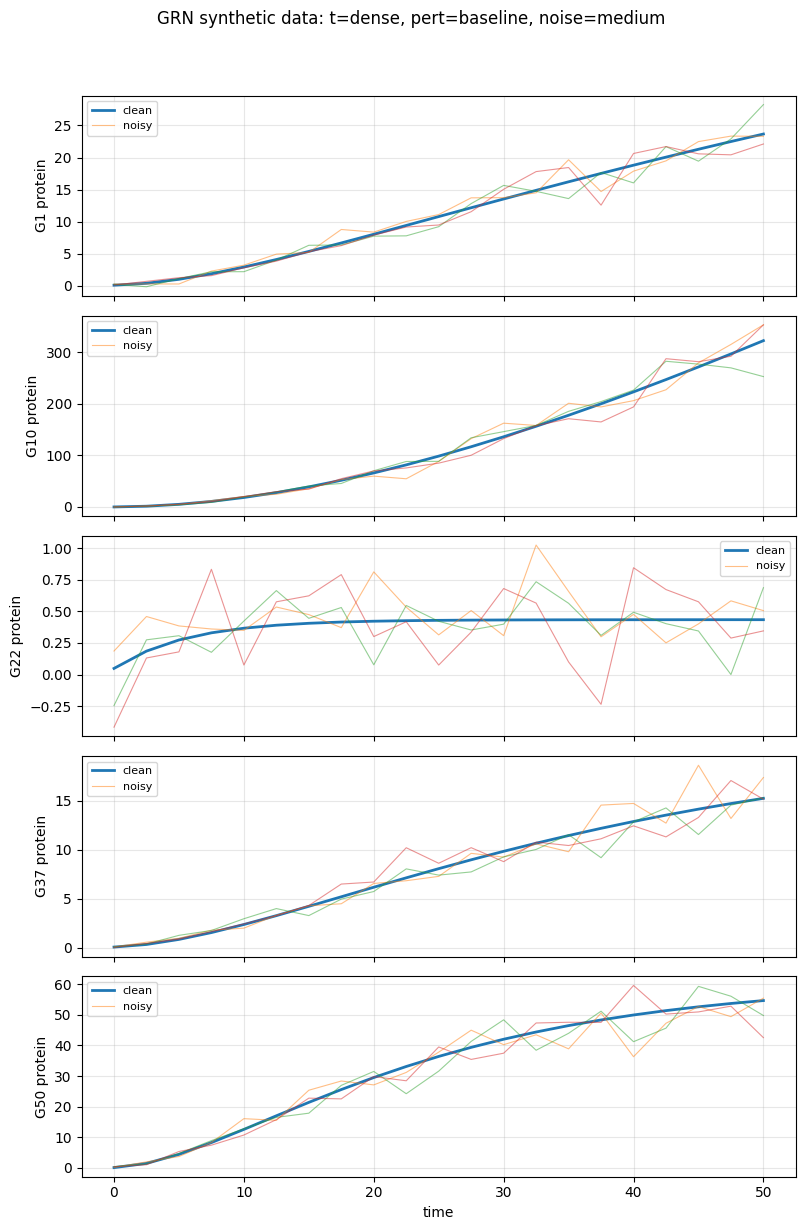

In [3]:
plot_condition_timecourses(
    exp_result,
    time_mode="dense",
    perturb_mode="baseline",
    noise_mode="medium",
    n_genes_to_show=5,
)

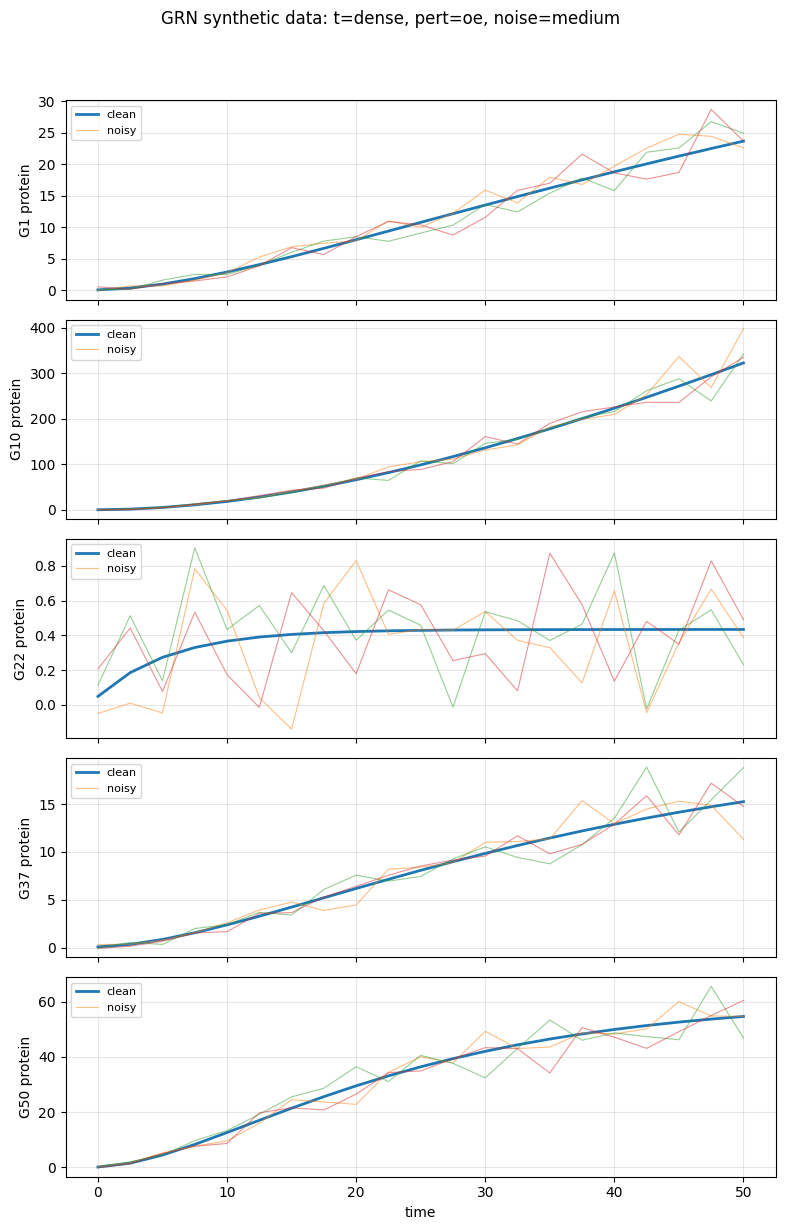

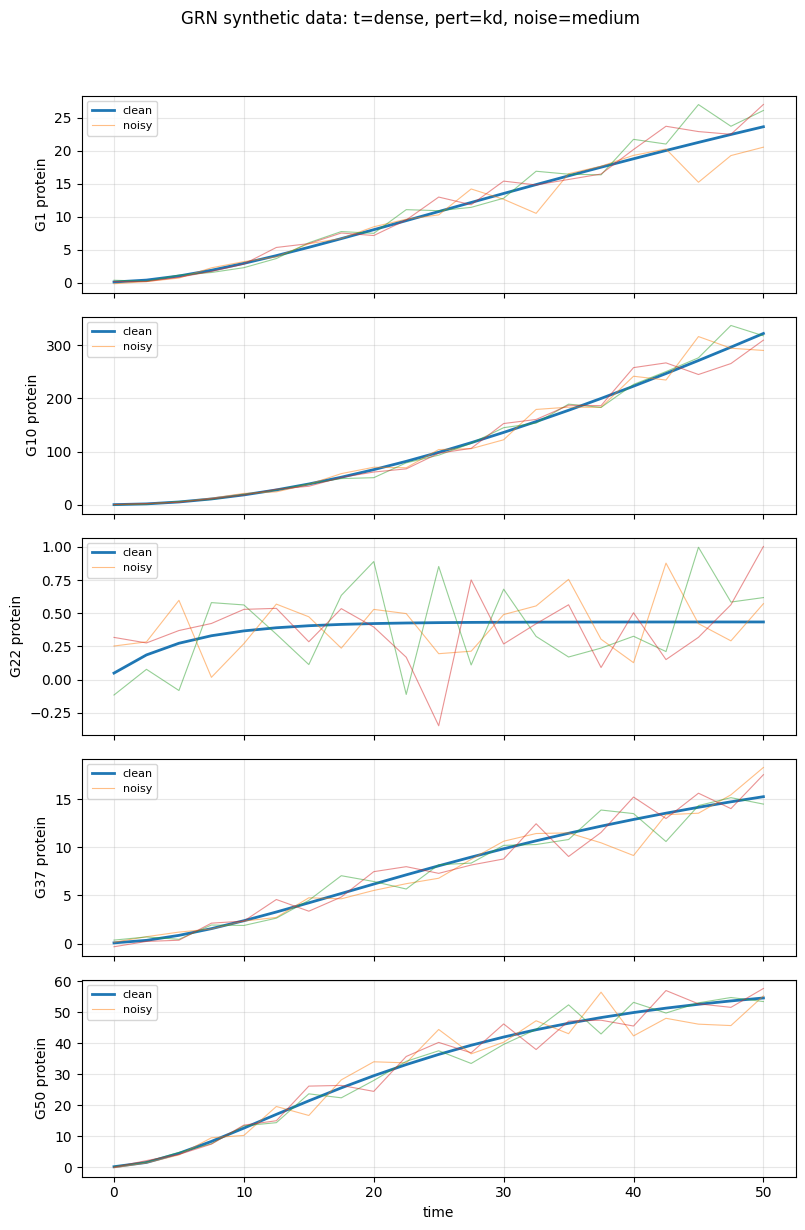

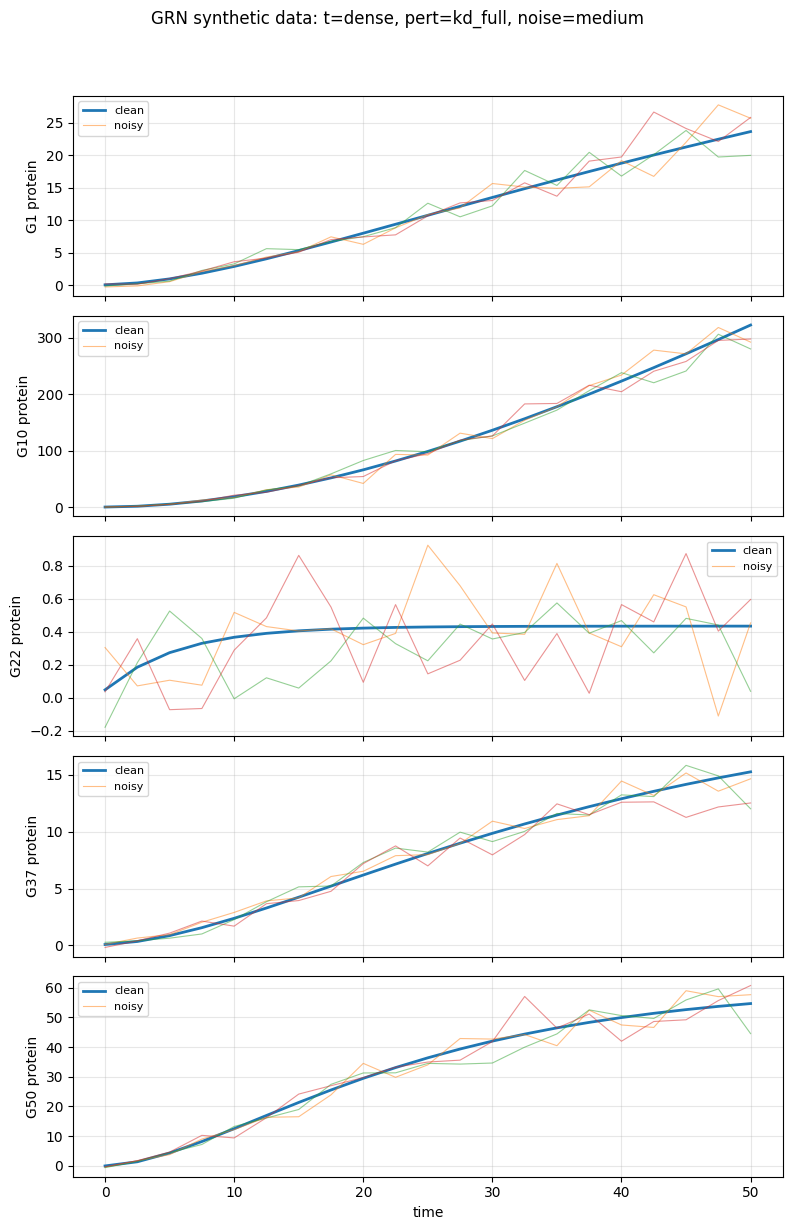

In [4]:
plot_condition_timecourses(exp_result, "dense", "oe", "medium", 5)
plot_condition_timecourses(exp_result, "dense", "kd", "medium", 5)
plot_condition_timecourses(exp_result, "dense", "kd_full", "medium", 5)